# Kaggle Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand
<br>
<br>
* Bike_Sharing_Demand.csv (10,886 * 12)
  * datetime : Date + Timestamp
  * season : 1(봄), 2(여름), 3(가을), 4(겨울)
  * holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
  * workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
  * weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/번개)
  * temp : 온도(섭씨)
  * atemp : 체감온도(섭씨)
  * humidity : 습도
  * windspeed : 풍속
  * casual : 사전 등록되지 않은 사용자 대여 횟수
  * registered : 사전 등록된 사용자 대여 횟수
  * count : 총 대여 횟수 -> y

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# I. Data Preprocessing

> ## 1) 'String' -> 'Date'

* 'year', 'month', 'day', 'hour' 추출

In [4]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x: x.hour)

In [5]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


> ## 2) Drop Columns

* 'datetime', 'casual', 'registered'

In [6]:
drop_columns = ['datetime', 'casual', 'registered']

DF.drop(drop_columns, axis = 1,inplace = True)

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [8]:
DF['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

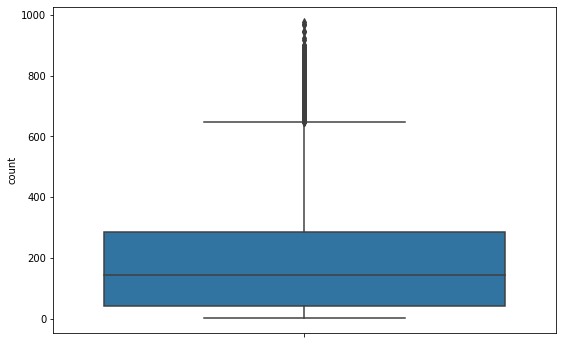

In [10]:
# 탐색적 데이터 분석

# 전체 사용자 수 분포

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9,6))
sns.boxplot(y='count',data=DF)
plt.show()

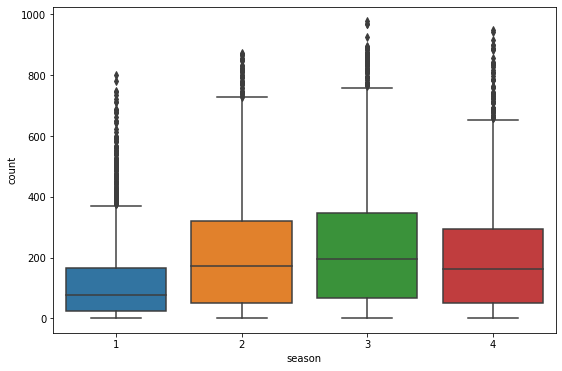

In [11]:
# 계절 - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='season', y='count', data=DF)
plt.show()

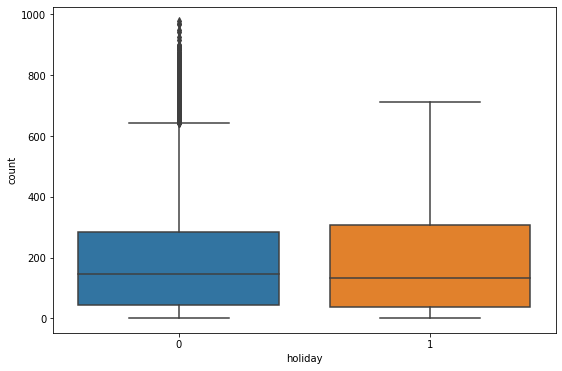

In [12]:
# holiday - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='holiday', y='count', data=DF)
plt.show()

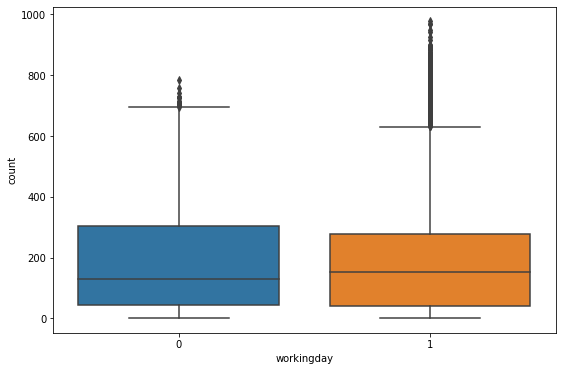

In [13]:
# workingday - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='workingday', y='count', data=DF)
plt.show()

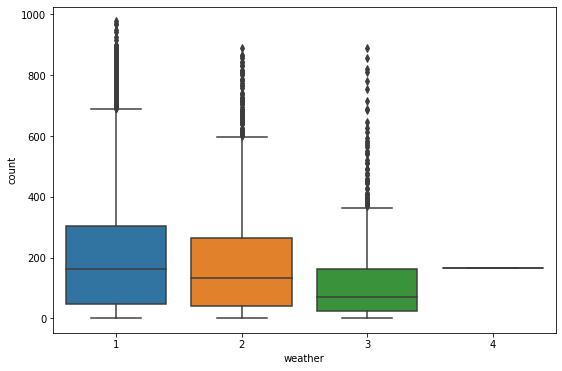

In [14]:
# weather - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='weather', y='count', data=DF)
plt.show()

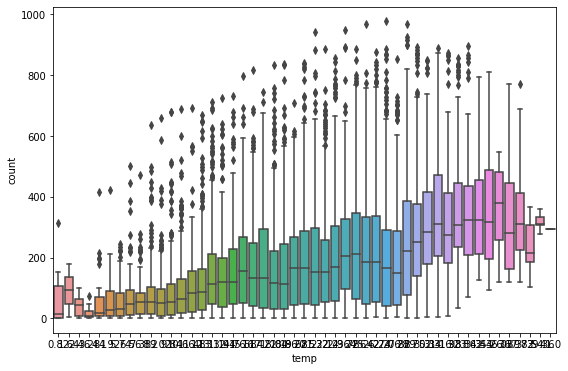

In [19]:
# temp - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='temp', y='count', data=DF)
plt.show()

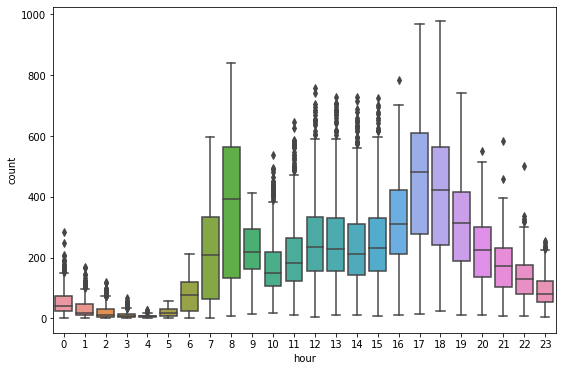

In [25]:
# hour - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='hour', y='count', data=DF)
plt.show()

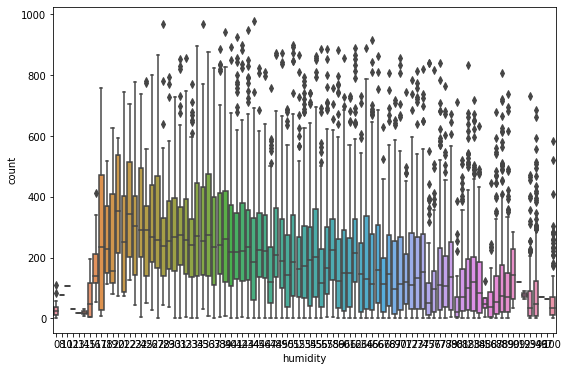

In [21]:
# humidity - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='humidity', y='count', data=DF)
plt.show()

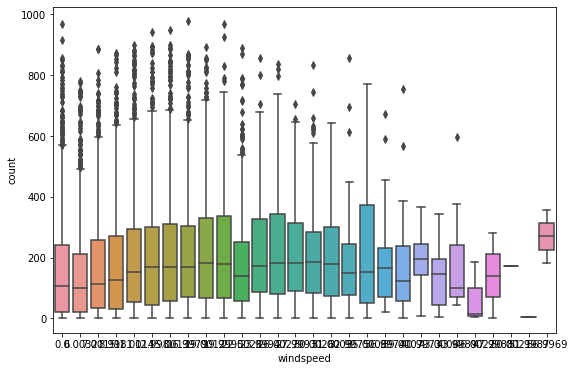

In [22]:
# windspeed - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='windspeed', y='count', data=DF)
plt.show()

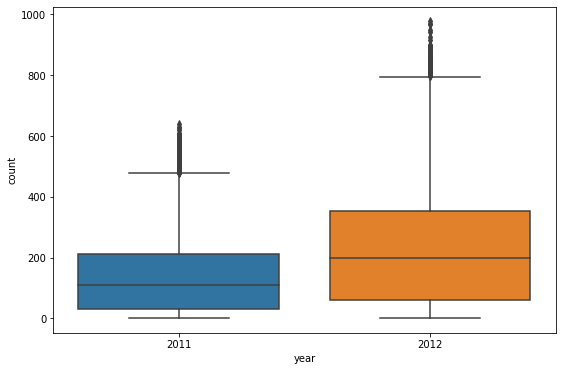

In [23]:
# year - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='year', y='count', data=DF)
plt.show()

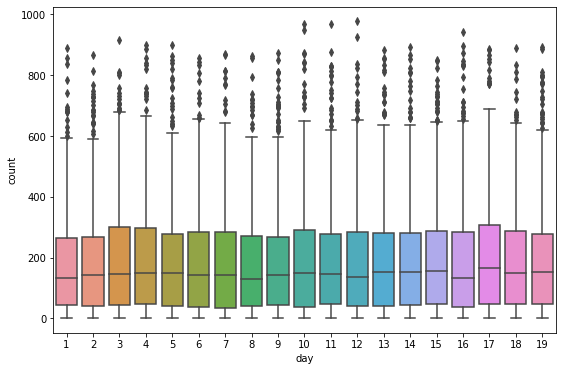

In [27]:
# day - 사용자수 분포

plt.figure(figsize = (9,6))
sns.boxplot(x='day', y='count', data=DF)
plt.show()

In [26]:
DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


### 1) 전체 columns 

In [28]:
# split(7:3) - 모든 columns
 
from sklearn.model_selection import train_test_split

X=DF[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7620, 12), (7620,), (3266, 12), (3266,))

In [30]:
# fit

from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#predict

y_hat = RA.predict(X_test)

In [32]:
# MSE1

from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)
np.sqrt(mse1)

142.2403004315699

### 2) day, windspeed,holiday 제외

In [40]:
# split - day, windspeedm holiday 제외

X=DF[['season','workingday','weather','temp','atemp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

In [41]:
# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#predict

y_hat = RA.predict(X_test)

In [43]:
# MSE2

mse2 = mean_squared_error(y_test, y_hat)
np.sqrt(mse2)

142.11780286594293

### 3) temp * atemp 

In [67]:

DF['temp2'] = DF.temp * DF.atemp

DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,temp2,week,humidity2,weekweather,hour2
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,141.6468,0,81,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,122.9877,0,80,0,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,122.9877,0,80,0,4
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,141.6468,0,75,0,9
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,141.6468,0,75,0,16


In [68]:
# split - day, windspeedm holiday 제외, tetmp * atemp

X=DF[['season','workingday','weather','temp2','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

In [69]:
# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
#predict

y_hat = RA.predict(X_test)

In [71]:
# MSE3

mse3 = mean_squared_error(y_test, y_hat)
np.sqrt(mse3)

142.45523125098632

### 4) workingday + holiday

In [52]:
DF['week'] = DF.workingday + DF.holiday

DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,temp2,week
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,1.968632e+14,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,1.057404e+13,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,1.057404e+13,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,1.968632e+14,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,1.968632e+14,0


In [53]:
# split

X=DF[['season','week','weather','temp','atemp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

In [54]:
# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#predict

y_hat = RA.predict(X_test)

In [56]:
# MSE4

mse4 = mean_squared_error(y_test, y_hat)
np.sqrt(mse4)

142.10822125853426

### 5) humidity * weather

In [57]:
DF['humidity2'] = DF.humidity * DF.weather

DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,temp2,week,humidity2
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,1.968632e+14,0,81
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,1.057404e+13,0,80
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,1.057404e+13,0,80
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,1.968632e+14,0,75
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,1.968632e+14,0,75


In [58]:
# split

X=DF[['season','week','humidity2','temp','atemp','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE5

mse5 = mean_squared_error(y_test, y_hat)
np.sqrt(mse5)

144.38134742991562

### 6) 4번모델에서 temp제외

In [59]:
# split

X=DF[['season','week','weather','atemp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE6

mse6 = mean_squared_error(y_test, y_hat)
np.sqrt(mse6)

142.15981776632722

### 7) 4번 모델에서 atemp 제외

In [73]:
# split

X=DF[['season','week','weather','temp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE7

mse7 = mean_squared_error(y_test, y_hat)
np.sqrt(mse7)

142.00390299607005

8) season, holiday, workingday, weather, temp, humidity, year, month, hour

In [63]:
# split

X=DF[['season','holiday','workingday','weather','temp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE8

mse8 = mean_squared_error(y_test, y_hat)
np.sqrt(mse8)

142.00496851617996

### 9) week * weather

In [64]:
DF['weekweather'] = DF.week * DF.weather
# split

X=DF[['season','weekweather','temp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE9

mse9 = mean_squared_error(y_test, y_hat)
np.sqrt(mse9)

142.0051412193368

### 10) ['season','week','weather','temp','humidity','year','month','temp^2']

In [74]:
DF['temp2'] = DF.temp **2
# split

X=DF[['season','week','weather','temp2','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE10

mse10 = mean_squared_error(y_test, y_hat)
np.sqrt(mse10)

142.4399798727748

### 11) season, weather, tmep, year, month, hour

In [75]:
# split

X=DF[['season','weather','temp','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE11

mse11 = mean_squared_error(y_test, y_hat)
np.sqrt(mse11)

145.78767590334485

### 12) holiday - workingday ( 주중(일) : -1, 주중(일X) : 1, 주말 : 0)

In [76]:
DF['week2'] = DF.holiday - DF.workingday

# split

X=DF[['season','week2','weather','temp','humidity','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE12

mse12 = mean_squared_error(y_test, y_hat)
np.sqrt(mse12)

142.01352304944828

In [80]:
# mse 빠른비교를 위해 array에 값 넣기

mse = []
mse.append(np.sqrt(mse1))
mse.append(np.sqrt(mse2))
mse.append(np.sqrt(mse3))
mse.append(np.sqrt(mse4))
mse.append(np.sqrt(mse5))
mse.append(np.sqrt(mse6))
mse.append(np.sqrt(mse7))
mse.append(np.sqrt(mse8))
mse.append(np.sqrt(mse9))
mse.append(np.sqrt(mse10))
mse.append(np.sqrt(mse11))
mse.append(np.sqrt(mse12))

mse


[142.2403004315699,
 142.11780286594293,
 142.45523125098632,
 142.10822125853426,
 144.38134742991562,
 142.15981776632722,
 142.00390299607005,
 142.00496851617996,
 142.0051412193368,
 142.4399798727748,
 145.78767590334485,
 142.01352304944828]

In [78]:
DF.drop(['humidity2','weekweather','temp2','week2'], axis = 1, inplace = True)
DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,week
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0


### 13) humidity **2

In [81]:
DF['humidity2'] = DF.humidity **2
# split

X=DF[['season','week','weather','temp','humidity2','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE13

mse13 = mean_squared_error(y_test, y_hat)
mse.append(np.sqrt(mse13))
mse[12]

142.0253916164868

In [82]:
DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,week,humidity2
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,6561
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,6400
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,6400
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,5625
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,5625


### 14) humidity * (-temp)

In [83]:
DF['humidity2'] = DF.humidity * (-(DF.temp))
# split

X=DF[['season','week','weather','humidity2','year','month','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE14

mse14 = mean_squared_error(y_test, y_hat)
mse.append(np.sqrt(mse14))
mse[13]

153.8212437373687

### 15) hour * temp

In [84]:
DF['hourtemp'] = DF.hour * DF.temp
# split

X=DF[['season','week','weather','humidity','year','month','hourtemp']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE15

mse15 = mean_squared_error(y_test, y_hat)
mse.append(np.sqrt(mse15))
mse[14]

140.70617125711874

### 16) month*temp

In [85]:
DF['monthtemp'] = DF.month * DF.temp
# split

X=DF[['season','week','weather','humidity','year','monthtemp','hour']]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

# fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

#predict

y_hat = RA.predict(X_test)

# MSE16

mse16 = mean_squared_error(y_test, y_hat)
mse.append(np.sqrt(mse16))
mse[15]

142.77067896601284

### 결과

In [86]:
min = min(mse)
index = mse.index(min)

print('최소 MSE 모델 : ', index+1)
print('sqrt(MSE)값 : ', min)

최소 MSE 모델 :  15
sqrt(MSE)값 :  140.70617125711874


15번 모델 : 'season','week','weather','humidity','year','month','hourtemp' ( hourtemp = hour * temp)